In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import networkx as nx
from text_cleaner import clean_text

In [63]:
# read Pride and Prejudice text and open it, named PaP_text
with open('Pride_and_Prejudice.txt', 'r', encoding='utf-8') as PaP_df:
    PaP_text = PaP_df.read()

In [64]:
# read only the text, ommiting prologue and index and end of book text
# create start to end text variable with only needed text
start = PaP_text.lower().find('chapter i.]')
end = PaP_text.lower().find('end of the project gutenberg ebook')

start_end_PaP = PaP_text[start:end]

print(start_end_PaP)

Chapter I.]


It is a truth universally acknowledged, that a single man in possession
of a good fortune must be in want of a wife.

However little known the feelings or views of such a man may be on his
first entering a neighbourhood, this truth is so well fixed in the minds
of the surrounding families, that he is considered as the rightful
property of some one or other of their daughters.

“My dear Mr. Bennet,” said his lady to him one day, “have you heard that
Netherfield Park is let at last?”

Mr. Bennet replied that he had not.

“But it is,” returned she; “for Mrs. Long has just been here, and she
told me all about it.”

Mr. Bennet made no answer.

“Do not you want to know who has taken it?” cried his wife, impatiently.

“_You_ want to tell me, and I have no objection to hearing it.”

[Illustration:

“He came down to see the place”

[_Copyright 1894 by George Allen._]]

This was invitation enough.

“Why, my dear, you must know, Mrs. Long says that Netherfield is taken
by a young ma

In [65]:
# run start to end text through text cleaning function
cleaned_PaP = clean_text(start_end_PaP)
print(cleaned_PaP[1000:1500])

 came down on monday in a chaise and four to see the place and was so much delighted with it that he agreed with mr. morris immediately that he is to take possession before michaelmas and some of his servants are to be in the house by the end of next week. what is his name? bingley. is he married or single? oh single my dear to be sure! a single man of large fortune four or five thousand a year. what a fine thing for our girls! how so? how can it affect them? my dear mr. bennet replied his wife 


In [66]:
# compare start to end text with cleaned start to end text after running it through text cleaning function
print("Original:")
print(start_end_PaP[1000:1200])

print("\nCleaned:")
print(cleaned_PaP[1000:1200])

Original:
n of large fortune from the north of England; that he came
down on Monday in a chaise and four to see the place, and was so much
delighted with it that he agreed with Mr. Morris immediately; that he i

Cleaned:
 came down on monday in a chaise and four to see the place and was so much delighted with it that he agreed with mr. morris immediately that he is to take possession before michaelmas and some of his 


In [67]:
PaP_character_aliases = {
    "elizabeth": ["elizabeth", "eliza", "miss bennet"],
    "darcy": ["darcy", "mr darcy", "fitzwilliam"],
    "jane": ["jane", "miss jane", "jane bennet"],
    "bingley": ["bingley", "mr bingley", "charles bingley"],
    "lydia": ["lydia", "miss lydia", "lydia bennet"],
    "wickham": ["wickham", "mr wickham", "george wickham"],
    "mr bennet": ["mr bennet", "bennet"],
    "mr collins": ["mr collins", "collins", "william collins"],
    "charlotte": ["charlotte", "charlotte lucas"],
    "lady catherine": ["lady catherine", "lady catherine de bourgh"],
    "georgiana": ["georgiana", "georgiana darcy"],
    "caroline": ["caroline", "caroline bingley", "miss bingley"],
    "mary": ["mary", "mary bennet"],
    "kitty": ["kitty", "catherine bennet"]
}

PaP_characters = list(PaP_character_aliases.keys())



PaP_mention_count = {

    char: len(re.findall(r'\b' + re.escape(char) + r'\b', cleaned_PaP))

    for char in PaP_characters                     

}

print(re.findall(r'\belizabeth\b', cleaned_PaP))
print(re.findall(r'\bdarcy\b', cleaned_PaP))

['elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth', 'elizabeth'

In [68]:
#make dataframe for character frequency mentions
PaP_mention_df = (
    pd.DataFrame.from_dict(
        PaP_mention_count, orient='index', columns=['Mentions'])
    .sort_values('Mentions', ascending=False)
)
PaP_mention_df

,Mentions
elizabeth,595
darcy,371
jane,262
bingley,259
wickham,160
lydia,132
lady catherine,101
kitty,69
charlotte,68
mary,38


<Axes: >

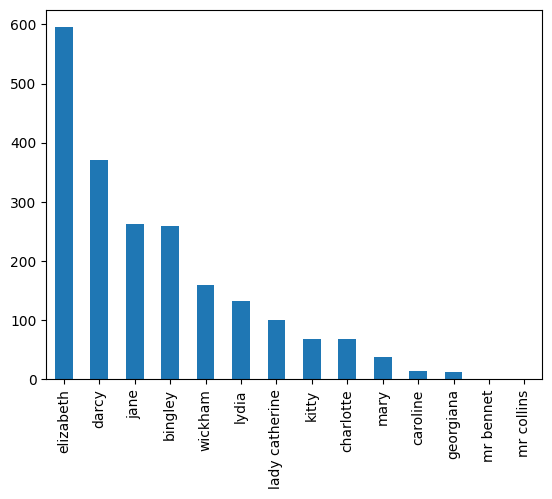

In [69]:
#create mention count series and graph it
PaP_mention_series = pd.Series(PaP_mention_count).sort_values(ascending=False)
PaP_mention_series.plot(kind='bar')

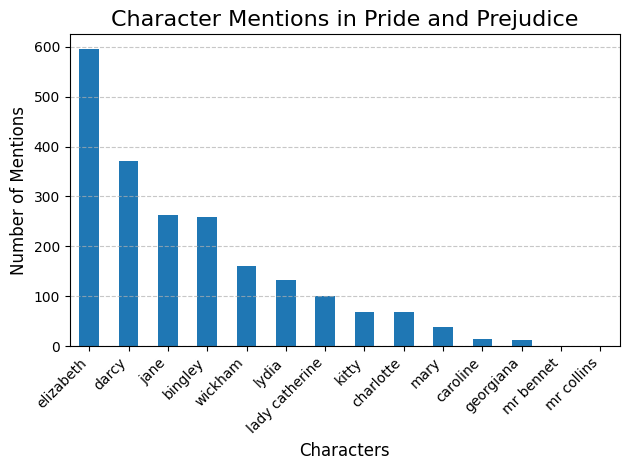

In [70]:
#improved bar chart
plt.Figure(figsize=(10,6))
PaP_mention_df.plot(kind='bar', legend = False)

plt.title("Character Mentions in Pride and Prejudice", fontsize=16)
plt.ylabel("Number of Mentions", fontsize=12)
plt.xlabel("Characters", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [71]:
# Split based on "chapter <number>"
chapter_list = re.split(r'chapter \d+', cleaned_PaP)

# Remove empty or whitespace-only entries
chapter_list = [ch.strip() for ch in chapter_list if ch.strip()]

In [72]:
# create co mention matrix 
PaP_co_mentions = pd.DataFrame(0, index=PaP_characters, columns=PaP_characters)

'''#fill co mention matrix - chapter by chapter method
for chapter_text in chapter_list:
    mentioned = [
        char for char in PaP_characters
        if re.search(r'\b' + re.escape(char) + r'\b', chapter_text)
    ]
    for i in range(len(mentioned)):
        for j in range(i + 1, len(mentioned)):
            PaP_co_mentions.loc[mentioned[i], mentioned[j]] += 1
            PaP_co_mentions.loc[mentioned[j], mentioned[i]] += 1'''

# split into paragraphs or sentences
paragraphs = cleaned_PaP.split('.')
paragraphs = [p.strip() for p in paragraphs if p.strip()]

# build co-mentions
for para in paragraphs:
    mentioned = set()

    for name, aliases in PaP_character_aliases.items():
        for alias in aliases:
            if re.search(r'\b' + re.escape(alias) + r'\b', para):
                mentioned.add(name)
                break

    mentioned = list(mentioned)
    for i in range(len(mentioned)):
        for j in range(i + 1, len(mentioned)):
            PaP_co_mentions.loc[mentioned[i], mentioned[j]] += 1
            PaP_co_mentions.loc[mentioned[j], mentioned[i]] += 1

print(PaP_co_mentions)

                elizabeth  darcy  jane  bingley  lydia  wickham  mr bennet  \
elizabeth               0     42    70       33     14       12         83   
darcy                  42      0     7       22      3        6          6   
jane                   70      7     0       27     12        6         11   
bingley                33     22    27        0      2        3         12   
lydia                  14      3    12        2      0       15          8   
wickham                12      6     6        3     15        0          2   
mr bennet              83      6    11       12      8        2          0   
mr collins             17      0     3        0      0        0          0   
charlotte              19      2     4        1      1        1          1   
lady catherine         18      4     0        1      0        1          6   
georgiana               3      4     0        3      0        1          0   
caroline               17     14    11       73      2        2 

In [73]:
PaP_co_mentions[PaP_co_mentions > 0].stack(
).sort_values(ascending=False).head(10)

mr bennet  elizabeth    83.0
elizabeth  mr bennet    83.0
caroline   bingley      73.0
bingley    caroline     73.0
jane       elizabeth    70.0
elizabeth  jane         70.0
           darcy        42.0
darcy      elizabeth    42.0
bingley    elizabeth    33.0
elizabeth  bingley      33.0
dtype: float64

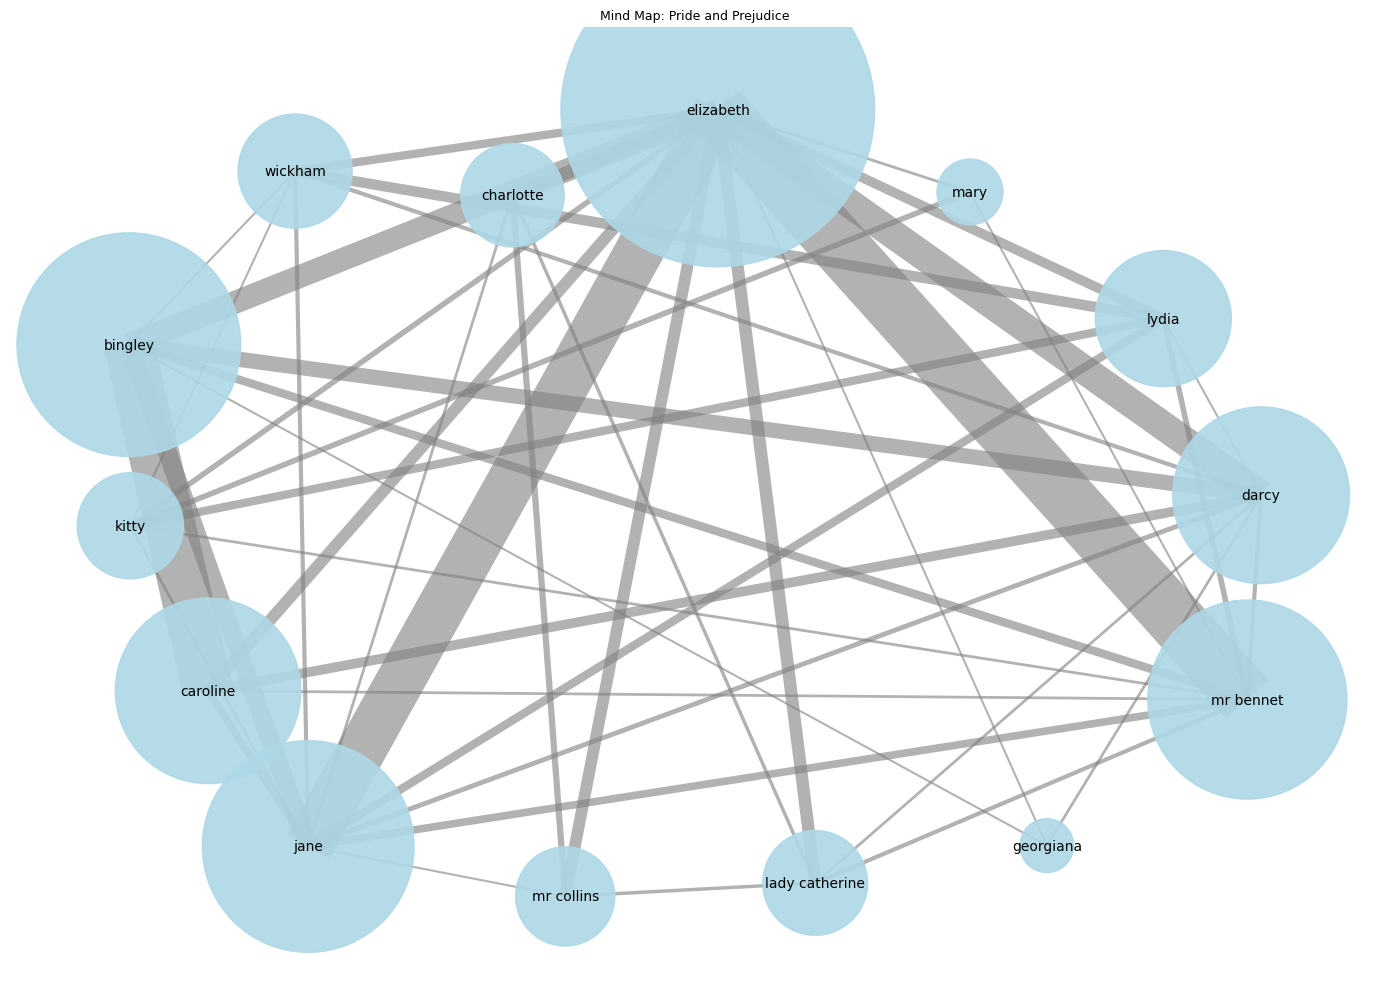

In [75]:
# Create graph
G = nx.Graph()

# Add nodes (characters)
for character in PaP_co_mentions.index:
    G.add_node(character)

# Add edges with weight threshold
for i in PaP_co_mentions.index:
    for j in PaP_co_mentions.columns:
        weight = PaP_co_mentions.loc[i, j]
        if i != j and weight >= 3:  # filter weak links
            G.add_edge(i, j, weight=weight)

# Node sizes: based on total connection weight
node_strength = dict(G.degree(weight='weight'))
node_sizes = [node_strength.get(n, 1) * 150 for n in G.nodes()]

# Edge weights for line thickness
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
edge_widths = [w / 2 for w in edge_weights]  # scale down

# Layout
pos = nx.spring_layout(G, k=500, seed=42)

# Plot
plt.figure(figsize=(14, 10))
nx.draw_networkx_nodes(G, pos, node_size=node_sizes,
                       node_color='lightblue', alpha=0.9)
nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color='gray', alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=10)

plt.title("Mind Map: Pride and Prejudice", fontsize=9)
plt.axis('off')
plt.tight_layout()
plt.show()